# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import categorical_accuracy
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import DirectoryIterator
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.model_selection import train_test_split
import splitfolders
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import cv2
import matplotlib.pyplot as plt

# Giving the dataset path

In [2]:
path_name = "/Users/ayushmehta/Downloads/Capston/RICE_LEAF/original copy"

# Splitting the dataset

In [3]:
splitfolders.ratio(input=path_name,output=path_name)

Copying files: 119 files [00:00, 1526.39 files/s]


# Checking the images

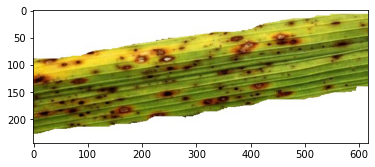

In [4]:
img = image.load_img("/Users/ayushmehta/Downloads/Capston/RICE_LEAF/Train/Brown spot/DSC_0101.jpg")
plt.imshow(img)

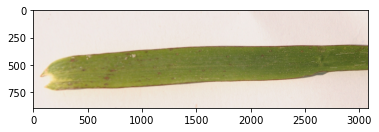

In [5]:
img = image.load_img("/Users/ayushmehta/Downloads/Capston/RICE_LEAF/Train/Leaf smut/DSC_0310.JPG")
plt.imshow(img)

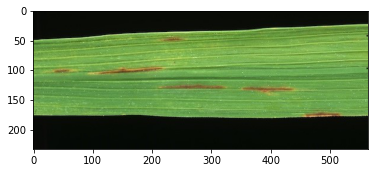

In [6]:
img = image.load_img("/Users/ayushmehta/Downloads/Capston/RICE_LEAF/Train/Leaf smut/DSC_0514.jpg")
plt.imshow(img)

# Checking the HSV image

In [ ]:
image = cv2.imread('/Users/ayushmehta/Downloads/Capston/RICE_LEAF/Train/Leaf smut/DSC_0514.jpg')
hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow('Original image',image)
cv2.imshow('HSV image', hsvImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Giving path of the splitted data

In [7]:
train_path = "/Users/ayushmehta/Downloads/Capston/RICE_LEAF/original copy/train"
valid_path = "/Users/ayushmehta/Downloads/Capston/RICE_LEAF/original copy/val"
test_path = "/Users/ayushmehta/Downloads/Capston/RICE_LEAF/original copy/test"

# Data augmentation

In [8]:
train_batches = ImageDataGenerator(rescale=1./225,rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest") \
.flow_from_directory(directory=train_path,target_size=(220,220),color_mode='rgb',classes=['Bacterial leaf blight','Brown spot','Leaf smut'],batch_size=10)

valid_batches = ImageDataGenerator(rescale=1./225,rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest") \
.flow_from_directory(directory=valid_path,target_size=(220,220),color_mode='rgb',classes=['Bacterial leaf blight','Brown spot','Leaf smut'])


test_batches = ImageDataGenerator(rescale=1./225,shear_range=0.2,zoom_range=0.2,width_shift_range=3,horizontal_flip=True,vertical_flip=True) \
.flow_from_directory(directory=test_path,target_size=(220,220),color_mode='rgb',classes=['Bacterial leaf blight','Brown spot','Leaf smut'],batch_size=10)

Found 95 images belonging to 3 classes.
Found 11 images belonging to 3 classes.
Found 13 images belonging to 3 classes.


In [9]:
train_batches.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int32)

# Initializing the checkpoint

In [10]:
model_path="/Users/ayushmehta/Downloads/Capston/RICE_LEAF/model/model.h5"
checkpoint=ModelCheckpoint(model_path, monitor= "val_accuracy",verbose=1, save_best_only=True, mode="max")
callbacks_list= [checkpoint]

# Creating the model

In [11]:
model= Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape=(220,220,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation("softmax"))

# Model summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 220, 220, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 220, 220, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 73, 73, 64)        0

# Compiling the model

In [13]:
INIT_LR=0.001
EPOCHS=100
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


# Training the model

In [14]:
history = model.fit(x=train_batches,batch_size=10,epochs=EPOCHS,verbose=2,callbacks=callbacks_list,validation_data=valid_batches)

Epoch 1/100
10/10 - 10s - loss: 0.9842 - accuracy: 0.5684 - val_loss: 0.9116 - val_accuracy: 0.4545

Epoch 00001: val_accuracy improved from -inf to 0.45455, saving model to /Users/ayushmehta/Downloads/Capston/RICE_LEAF/model/model.h5
Epoch 2/100
10/10 - 9s - loss: 0.7007 - accuracy: 0.6421 - val_loss: 2.4302 - val_accuracy: 0.3636

Epoch 00002: val_accuracy did not improve from 0.45455
Epoch 3/100
10/10 - 11s - loss: 0.5280 - accuracy: 0.6947 - val_loss: 3.1031 - val_accuracy: 0.2727

Epoch 00003: val_accuracy did not improve from 0.45455
Epoch 4/100
10/10 - 10s - loss: 0.4383 - accuracy: 0.7895 - val_loss: 4.5903 - val_accuracy: 0.2727

Epoch 00004: val_accuracy did not improve from 0.45455
Epoch 5/100
10/10 - 12s - loss: 0.4597 - accuracy: 0.8105 - val_loss: 6.6878 - val_accuracy: 0.2727

Epoch 00005: val_accuracy did not improve from 0.45455
Epoch 6/100
10/10 - 11s - loss: 0.4224 - accuracy: 0.7789 - val_loss: 5.7179 - val_accuracy: 0.2727

Epoch 00006: val_accuracy did not improve


Epoch 00051: val_accuracy did not improve from 0.72727
Epoch 52/100
10/10 - 11s - loss: 0.2125 - accuracy: 0.8737 - val_loss: 5.0547 - val_accuracy: 0.2727

Epoch 00052: val_accuracy did not improve from 0.72727
Epoch 53/100
10/10 - 10s - loss: 0.3535 - accuracy: 0.8316 - val_loss: 8.6292 - val_accuracy: 0.0909

Epoch 00053: val_accuracy did not improve from 0.72727
Epoch 54/100
10/10 - 10s - loss: 0.3792 - accuracy: 0.7789 - val_loss: 5.3678 - val_accuracy: 0.1818

Epoch 00054: val_accuracy did not improve from 0.72727
Epoch 55/100
10/10 - 10s - loss: 0.3058 - accuracy: 0.8632 - val_loss: 2.9633 - val_accuracy: 0.2727

Epoch 00055: val_accuracy did not improve from 0.72727
Epoch 56/100
10/10 - 10s - loss: 0.3207 - accuracy: 0.8211 - val_loss: 3.3607 - val_accuracy: 0.2727

Epoch 00056: val_accuracy did not improve from 0.72727
Epoch 57/100
10/10 - 10s - loss: 0.3752 - accuracy: 0.8000 - val_loss: 2.7084 - val_accuracy: 0.2727

Epoch 00057: val_accuracy did not improve from 0.72727
Ep

# Loss accuracy graph

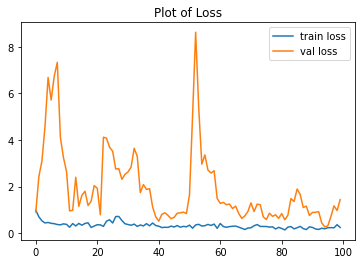

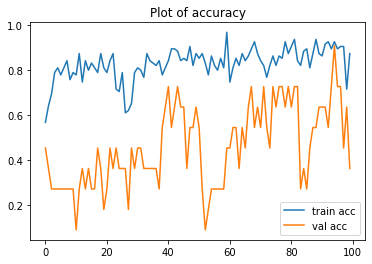

In [15]:
# plot the loss
plt.title('Plot of Loss')
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

 
# plot the accuracy
plt.title('Plot of accuracy')
plt.plot(model.history.history['accuracy'], label='train acc')
plt.plot(model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Looking at the test images

In [23]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed 
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

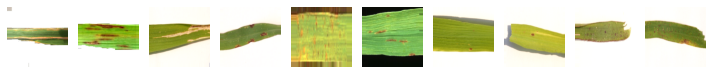

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [25]:
test_imgs, test_labels = next(test_batches)   #segregating test images and labels
plotImages(test_imgs)
print(test_labels)

In [26]:
test_batches.classes

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [27]:
test_batches.class_mode

'categorical'

In [28]:
test_batches.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

# Prediction

In [29]:
predictions = model.predict(x=test_batches,verbose=0)

In [30]:
print(predictions)

[[3.79394653e-04 6.40919723e-04 9.98979628e-01]
 [1.58047347e-04 6.83210135e-01 3.16631764e-01]
 [9.78653073e-01 1.84273534e-03 1.95042361e-02]
 [2.65339418e-06 8.00398411e-05 9.99917269e-01]
 [1.42788947e-01 8.57210577e-01 4.24082515e-07]
 [1.08793832e-01 1.19335586e-04 8.91086876e-01]
 [2.45907257e-04 1.52094197e-02 9.84544635e-01]
 [1.01525821e-01 8.98474216e-01 1.38321630e-08]
 [2.33241106e-08 3.82087710e-05 9.99961734e-01]
 [6.01183444e-07 4.24273348e-05 9.99956965e-01]
 [7.73034059e-03 1.17629487e-02 9.80506659e-01]
 [1.64429366e-05 1.64931566e-02 9.83490467e-01]
 [2.35043541e-02 9.76445913e-01 4.96639914e-05]]


# Confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions, axis= -1))

array([[1, 1, 2],
       [0, 2, 2],
       [0, 1, 4]])